In [64]:
from functools import partial
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook

In [153]:
num_arms = 10000
np.random.seed(42)
means = np.random.uniform(low=0.0, high=1.0, size=num_arms)

In [154]:
class BernoulliArm:
    
    def __init__(self, p):
        self.rv = partial(bernoulli.rvs, p=p, loc=0)
        
    def pull(self):
        # at any time t, if the current arm is pulled, only one reward is observed, hence size=1
        return float(self.rv(size=1))

## Test BernoulliRV

In [155]:
arm = BernoulliArm(p=0.1)

In [156]:
arm.pull()

0.0

In [157]:
rewards = []
for i in range(100):
    rewards.append(arm.pull())

(array([89.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

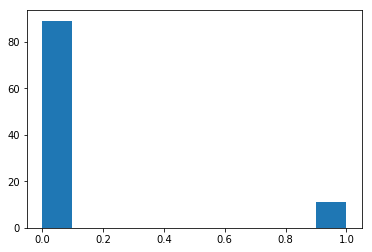

In [158]:
plt.hist(rewards)

## Generate arms

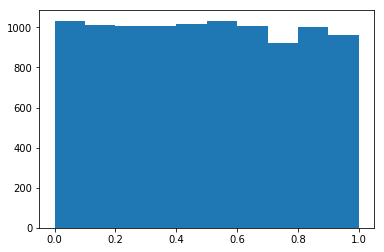

In [159]:
plt.hist(means)
plt.show()

In [160]:
arms = [BernoulliArm(p=p) for p in means]
max_reward = np.max(means)
print(max_reward)

0.9997176732861306


## Two-target algorithm for known time horizon

In [200]:
m = 5  # for each arm, the number of additional runs to make if the first one fails
n = 10 ** 5

In [201]:
l1 = (n / 2) ** (1 / 3)
l2 = m * (n / 2) ** (1 / 2)
print(l1, l2)

36.84031498640386 1118.033988749895


In [202]:
I = 0
L = 0  # the length of the current run
M = 0
EXPLOIT = False

cumulative_reward = 0
cumulative_rewards = []
timesteps = np.arange(n)

for t in tqdm_notebook(timesteps):
    
    X = arms[I].pull()
    
    regret = 1 - X
    cumulative_reward += regret
    cumulative_rewards.append(cumulative_reward)
    
    if not EXPLOIT:
        if X == 1:
            L = L + 1
        else:
            M = M + 1  # increment the number of failed runs
            if M == 1:  # after the first failed run
                if L < l1:
                   I = I + 1  # next arm 
                   L = 0
                   M = 0
            elif M == m:
                if L < l2:
                    I = I + 1
                    L = 0
                    M = 0
                else:
                    EXPLOIT = True

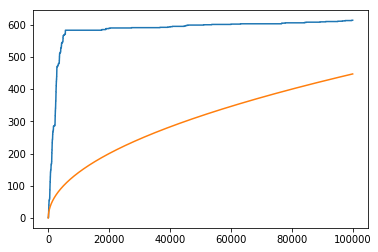

In [203]:
plt.plot(cumulative_rewards)
plt.plot(timesteps, np.sqrt(2 * timesteps), label='Expected regret')
plt.show()

Questions:
- is it O(sqrt(2n)) or just sqrt(2n)